In [1]:
# import libraries
import qiskit as q
from qiskit import Aer
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.circuit import Parameter
%matplotlib inline

In [2]:
# Look at the existance backend
for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [3]:
# Choose a backend
sim_backend = Aer.get_backend('qasm_simulator')

In [4]:
# Construct quantum circuit
circ = q.QuantumCircuit(4, 4)

circ.x(0)
circ.cz(0, 1)
circ.cz(0, 2)
circ.cz(0, 3)
circ.cz(1, 2)
circ.cz(1, 3)
circ.cz(2, 3)
circ.measure([0,1],[0,1])

circ.draw()

┌───┐               ┌─┐      
q_0: ┤ X ├─■──■──■───────┤M├──────
     └───┘ │  │  │       └╥┘   ┌─┐
q_1: ──────■──┼──┼──■──■──╫────┤M├
              │  │  │  │  ║    └╥┘
q_2: ─────────■──┼──■──┼──╫──■──╫─
                 │     │  ║  │  ║ 
q_3: ────────────■─────■──╫──■──╫─
                          ║     ║ 
c: 4/═════════════════════╩═════╩═
                          0     1

In [5]:
job = q.execute(circ, backend=sim_backend, shots=1024)
job_monitor(job)

Job Status: job has successfully run


In [ ]:
result = job.result()
counts = result.get_counts(circ)
plot_histogram([counts])

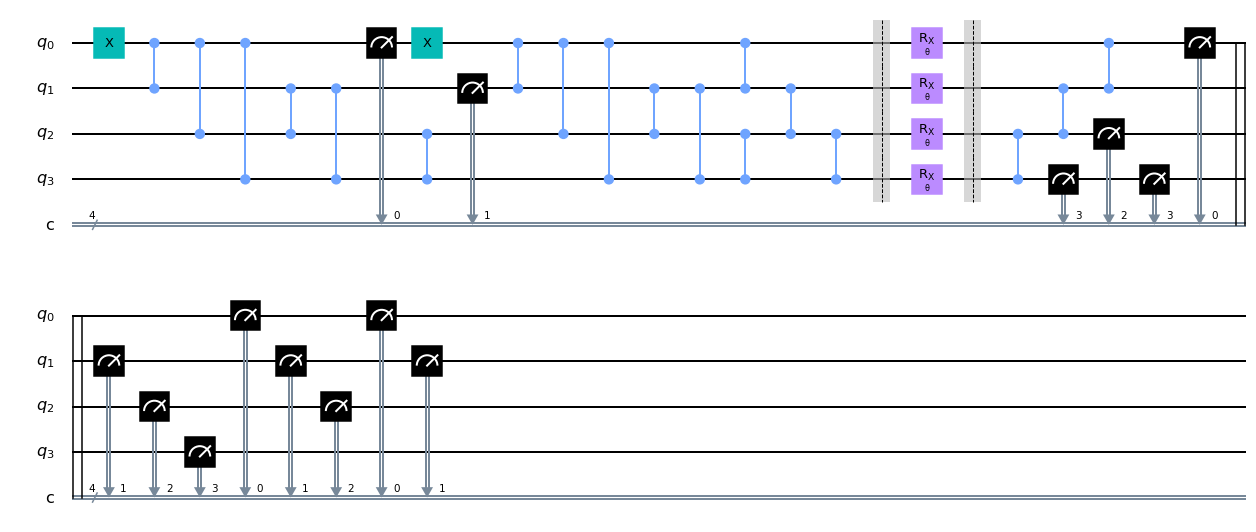

In [6]:
# integrate the parameter theta
theta = Parameter('θ')

n = 4

circ.x(0)
circ.cz(0, 1)
circ.cz(0, 2)
circ.cz(0, 3)
circ.cz(1, 2)
circ.cz(1, 3)
circ.cz(2, 3)
for i in range(n-1):
    circ.cz(i, i+1)
    
circ.barrier()
circ.rx(theta, range(4))
circ.barrier()

for i in reversed(range(n-1)):
    circ.cz(i, i+1)

circ.measure([0,1],[0,1])
circ.measure([0,2],[0,2])
circ.measure([0,3],[0,3])
circ.measure([1,2],[1,2])
circ.measure([1,3],[1,3])
circ.measure([2,3],[2,3])

circ.draw('mpl')

In [7]:
theta_range = np.linspace(0, 2 * np.pi, 128)

In [8]:
circuits = [circ.bind_parameters({theta: theta_val})
            for theta_val in theta_range]

circuits[-1].draw()

┌───┐               ┌─┐┌───┐                            ░ ┌─────────┐ ░ »
q_0: ┤ X ├─■──■──■───────┤M├┤ X ├────■──■──■────────■────────░─┤ RX(2pi) ├─░─»
     └───┘ │  │  │       └╥┘└───┘┌─┐ │  │  │        │        ░ ├─────────┤ ░ »
q_1: ──────■──┼──┼──■──■──╫──────┤M├─■──┼──┼──■──■──■──■─────░─┤ RX(2pi) ├─░─»
              │  │  │  │  ║      └╥┘    │  │  │  │     │     ░ ├─────────┤ ░ »
q_2: ─────────■──┼──■──┼──╫───■───╫─────■──┼──■──┼──■──■──■──░─┤ RX(2pi) ├─░─»
                 │     │  ║   │   ║        │     │  │     │  ░ ├─────────┤ ░ »
q_3: ────────────■─────■──╫───■───╫────────■─────■──■─────■──░─┤ RX(2pi) ├─░─»
                          ║       ║                          ░ └─────────┘ ░ »
c: 4/═════════════════════╩═══════╩══════════════════════════════════════════»
                          0       1                                          »
«                 ┌─┐         ┌─┐      ┌─┐   
«q_0: ───────■────┤M├─────────┤M├──────┤M├───
«            │    └╥┘┌─┐      └╥┘┌─┐   └╥┘┌─┐
«q_1: ────■──■─────╫─┤M├───────╫─┤M├────╫─┤M├
«         │ ┌─┐    ║ └╥┘┌─┐    ║ └╥┘┌─┐ ║ └╥┘
«q_2: ─■──■─┤M├────╫──╫─┤M├────╫──╫─┤M├─╫──╫─
«      │ ┌─┐└╥┘┌─┐ ║  ║ └╥┘┌─┐ ║  ║ └╥┘ ║  ║ 
«q_3: ─■─┤M├─╫─┤M├─╫──╫──╫─┤M├─╫──╫──╫──╫──╫─
«        └╥┘ ║ └╥┘ ║  ║  ║ └╥┘ ║  ║  ║  ║  ║ 
«c: 4/════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
«         3  2  3  0  1  2  3  0  1  2  0  1